Imports usados.

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importando o Data Frame.

In [179]:
df = pd.read_csv('screen_time.csv', delimiter=',')

1. Mostre a relação total de horas gastas entre tempo total de tela recreacional e educacional entre crianças de 5 anos. (Por semana)

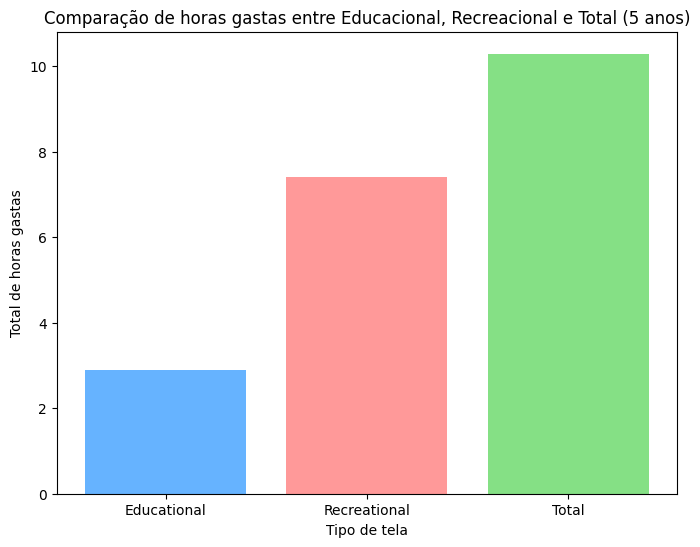

In [180]:
def comparar_tipos_tela_5anos():
    # Filtrar dados apenas para crianças de 5 anos e tipos "Educational" e "Recreational"
    tipos_tela_5anos = df[(df['Age'] == 5) & (df['Screen Time Type'].isin(['Educational', 'Recreational']))]

    # Agrupar por tipo de tela e calcular a soma de horas gastas
    soma_horas = tipos_tela_5anos.groupby('Screen Time Type')['Average Screen Time (hours)'].sum()

    # Adicionar o tempo total de tela
    soma_horas['Total'] = soma_horas.sum()

    # Dados para o gráfico
    labels = soma_horas.index
    values = soma_horas.values
    colors = ['#66b3ff', '#ff9999', '#85e085']  # Azul, Vermelho, Verde

    # Criar o gráfico de colunas
    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=colors)
    plt.title('Comparação de horas gastas entre Educacional, Recreacional e Total (5 anos)')
    plt.ylabel('Total de horas gastas')
    plt.xlabel('Tipo de tela')
    plt.show()


# Chamar a função para exibir o gráfico
comparar_tipos_tela_5anos()

2. Mostre a relação total de horas gastas entre tempo total de tela recreacional e educacional entre crianças de 6 a 11 anos. (Por semana)

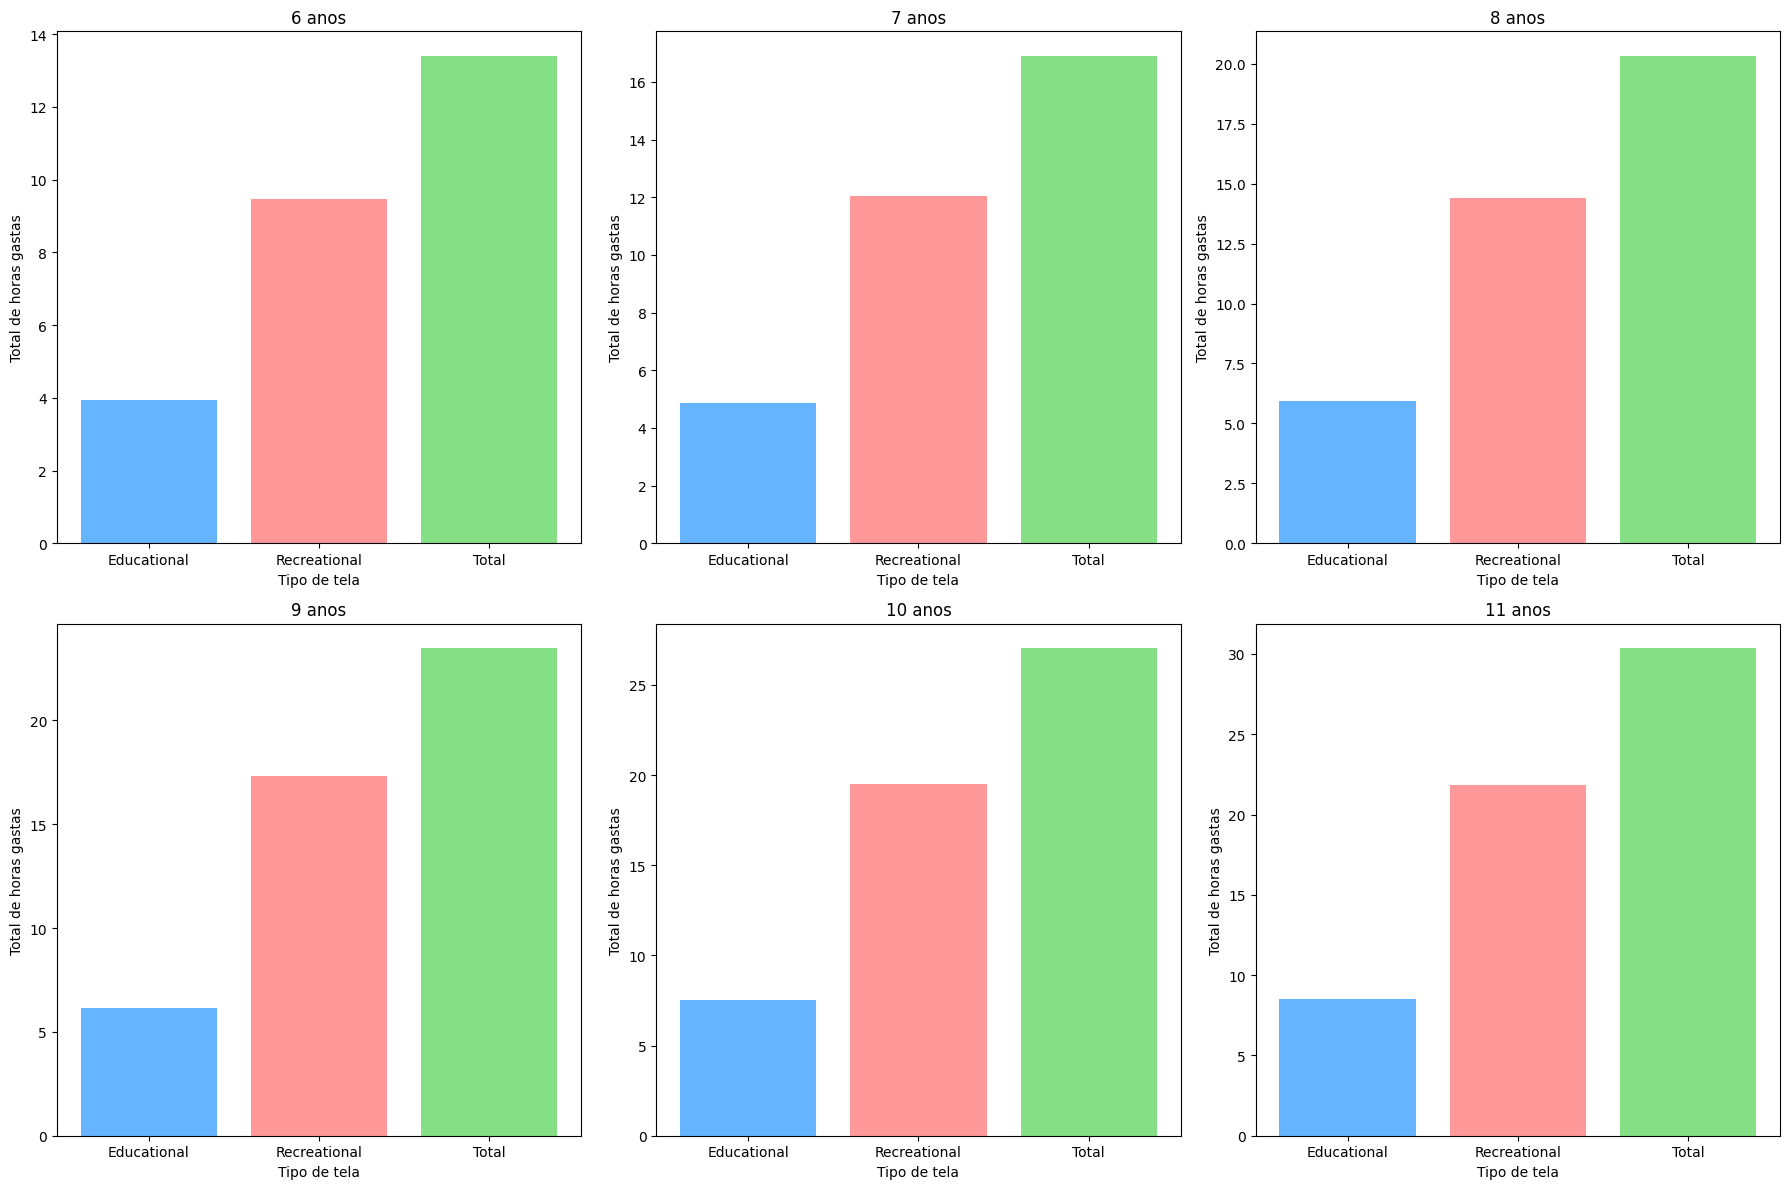

In [181]:
# Criar uma figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 linhas, 3 colunas de gráficos
axes = axes.flatten()  # Achatar a matriz de eixos para facilitar o acesso

# Dados para os gráficos
for i, idade in enumerate(range(6, 12)):  # De 6 a 11 anos
    tipos_tela_por_idade = df[(df['Age'] == idade) & (df['Screen Time Type'].isin(['Educational', 'Recreational']))]
    soma_horas = tipos_tela_por_idade.groupby('Screen Time Type')['Average Screen Time (hours)'].sum()
    total_horas = soma_horas.sum()  # Calcular o total de horas gastas

    labels = soma_horas.index.tolist() + ['Total']
    values = soma_horas.values.tolist() + [total_horas]

    # Criar o gráfico de colunas para cada idade no subplot correspondente
    axes[i].bar(labels, values, color=colors + ['#85e085'])  # Adicionar a cor verde para o total
    axes[i].set_title(f'{idade} anos')
    axes[i].set_ylabel('Total de horas gastas')
    axes[i].set_xlabel('Tipo de tela')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()


3. Mostre a relação total de horas gastas entre tempo total de tela recreacional e educacional entre crianças de mais de 11 anos. (Por semana)

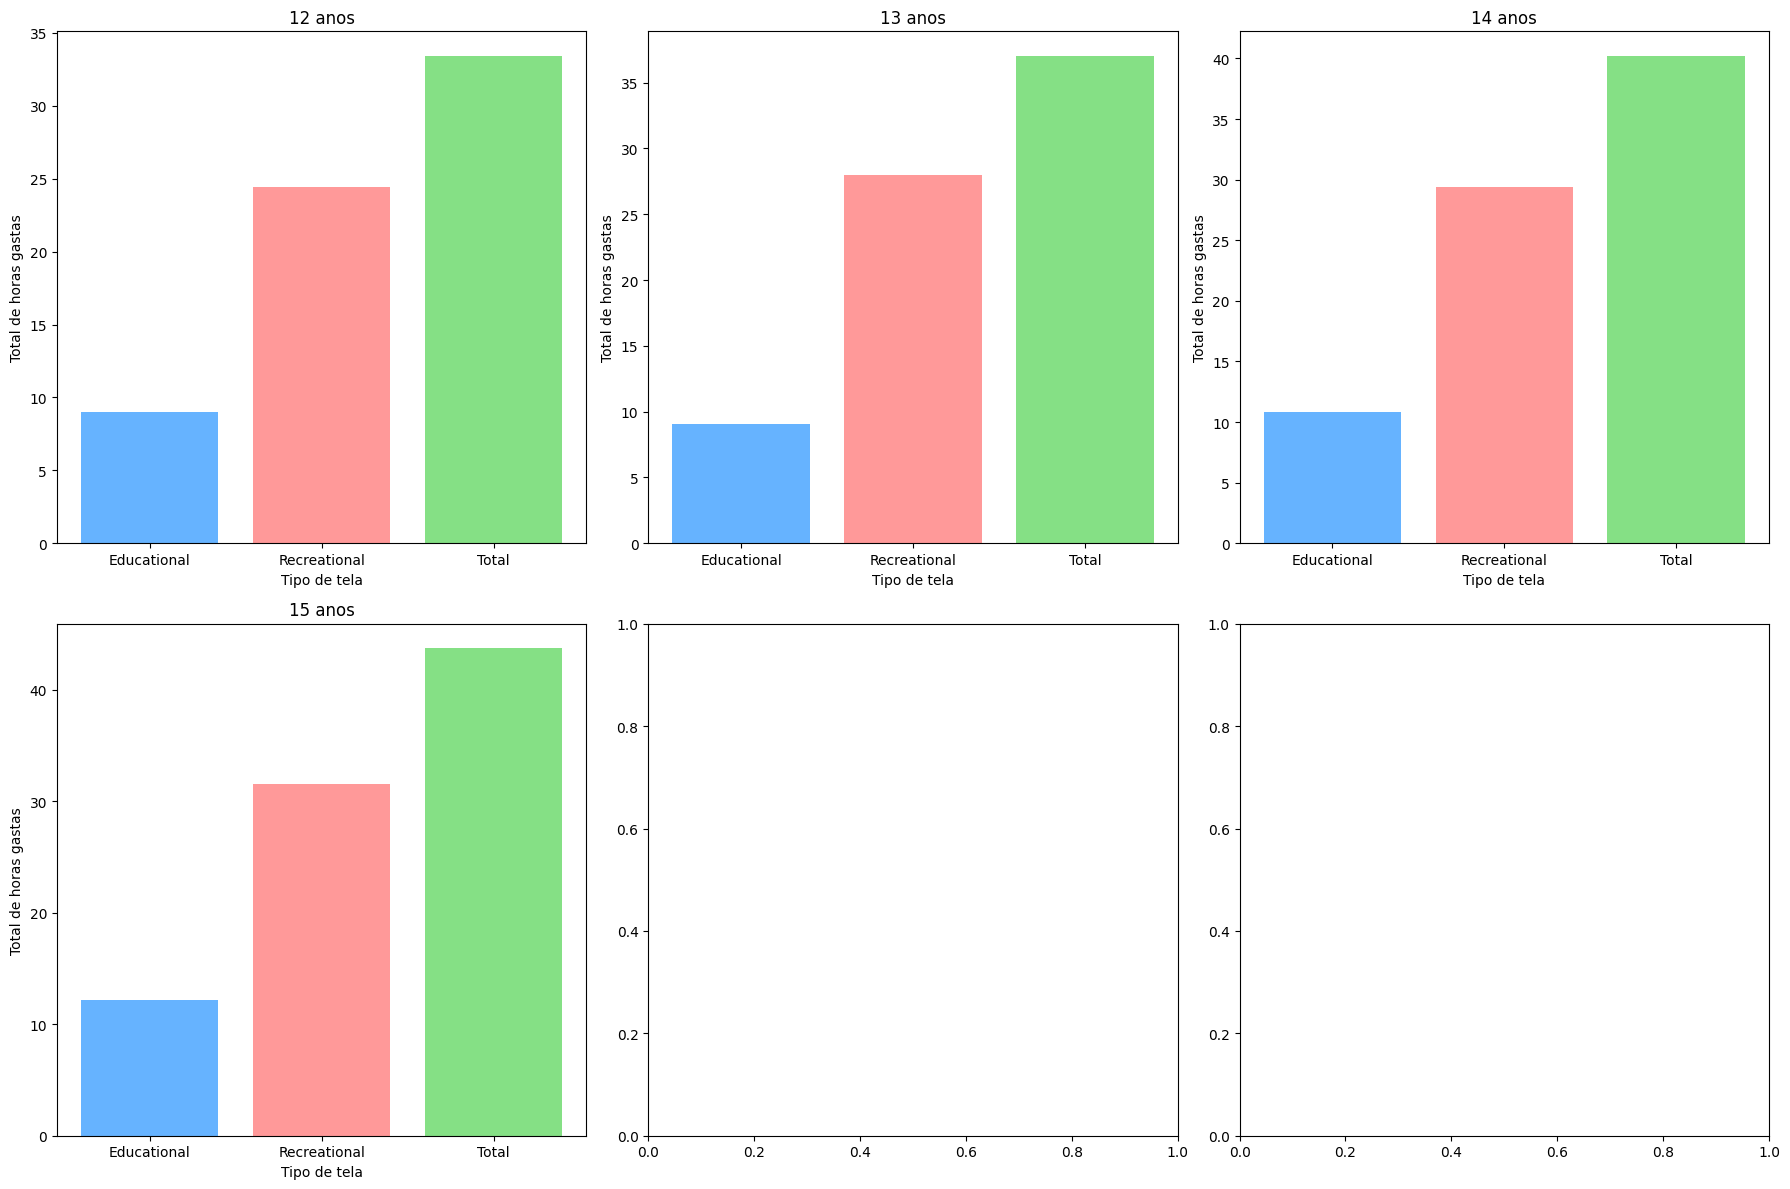

In [182]:
# Criar uma figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 linhas, 3 colunas de gráficos
axes = axes.flatten()  # Achatar a matriz de eixos para facilitar o acesso

# Dados para os gráficos
for i, idade in enumerate(range(12, 16)):  # De 12 a 17 anos
    tipos_tela_por_idade = df[(df['Age'] == idade) & (df['Screen Time Type'].isin(['Educational', 'Recreational']))]
    soma_horas = tipos_tela_por_idade.groupby('Screen Time Type')['Average Screen Time (hours)'].sum()
    total_horas = soma_horas.sum()  # Calcular o total de horas gastas

    labels = soma_horas.index.tolist() + ['Total']
    values = soma_horas.values.tolist() + [total_horas]

    # Criar o gráfico de colunas para cada idade no subplot correspondente
    axes[i].bar(labels, values, color=colors + ['#85e085'])  # Adicionar a cor verde para o total
    axes[i].set_title(f'{idade} anos')
    axes[i].set_ylabel('Total de horas gastas')
    axes[i].set_xlabel('Tipo de tela')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()


4. Relação de tempo de tela recomendado para crianças de 5 anos recreacioal.

Quantidade de crianças de 5 anos com mais de 1 hora de tempo de tela (exceto Total): 2000


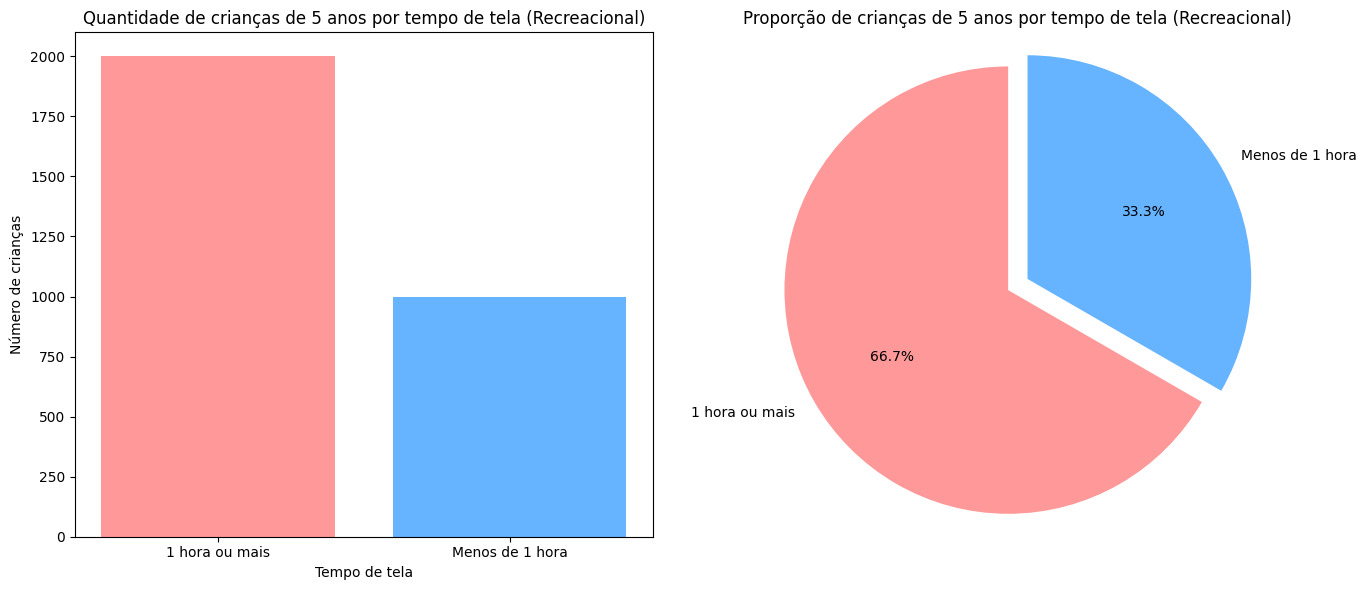

In [183]:
def ScreenTime5anos():
    # Filtrar crianças de 5 anos com mais de 1 hora de tempo de tela e tipo de tela Recreacional
    criancas_5_anos = df[(df['Age'] == 5) & 
                         (df['Average Screen Time (hours)'] >= 1) & 
                         (df['Screen Time Type'] == 'Recreational')]

    # Filtrar crianças de 5 anos com 1 hora ou menos de tempo de tela e tipo de tela Recrecional
    criancas_5_anos_abaixo = df[(df['Age'] == 5) & 
                                (df['Average Screen Time (hours)'] < 1) & 
                                (df['Screen Time Type'] == 'Recreational')]

    # Contar o número de crianças em cada grupo
    numero_acima = criancas_5_anos['Sample Size'].sum()
    numero_abaixo = criancas_5_anos_abaixo['Sample Size'].sum()

    print(f"Quantidade de crianças de 5 anos com mais de 1 hora de tempo de tela (exceto Total): {numero_acima}")

    # Dados para os gráficos
    labels = ['1 hora ou mais', 'Menos de 1 hora']
    values = [numero_acima, numero_abaixo]
    colors = ['#ff9999', '#66b3ff']
    explode = (0.1, 0)  # Destacar o primeiro pedaço no gráfico de pizza

    # Criar o primeiro subplot para o gráfico de barras
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
    plt.bar(labels, values, color=colors)
    plt.title('Quantidade de crianças de 5 anos por tempo de tela (Recreacional)')
    plt.ylabel('Número de crianças')
    plt.xlabel('Tempo de tela')

    # Criar o segundo subplot para o gráfico de pizza
    plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
    plt.pie(values, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
    plt.title('Proporção de crianças de 5 anos por tempo de tela (Recreacional)')
    plt.axis('equal')  # Garantir que o gráfico seja um círculo

    # Exibir os gráficos
    plt.tight_layout()
    plt.show()


# Quantidade de crianças de 5 anos com mais de 1 hora de tempo de tela (exceto Total) e gráficos lado a lado
ScreenTime5anos()

5. Relação de tempo de tela recomendado para crianças entre 6 e 11 anos recreacional.

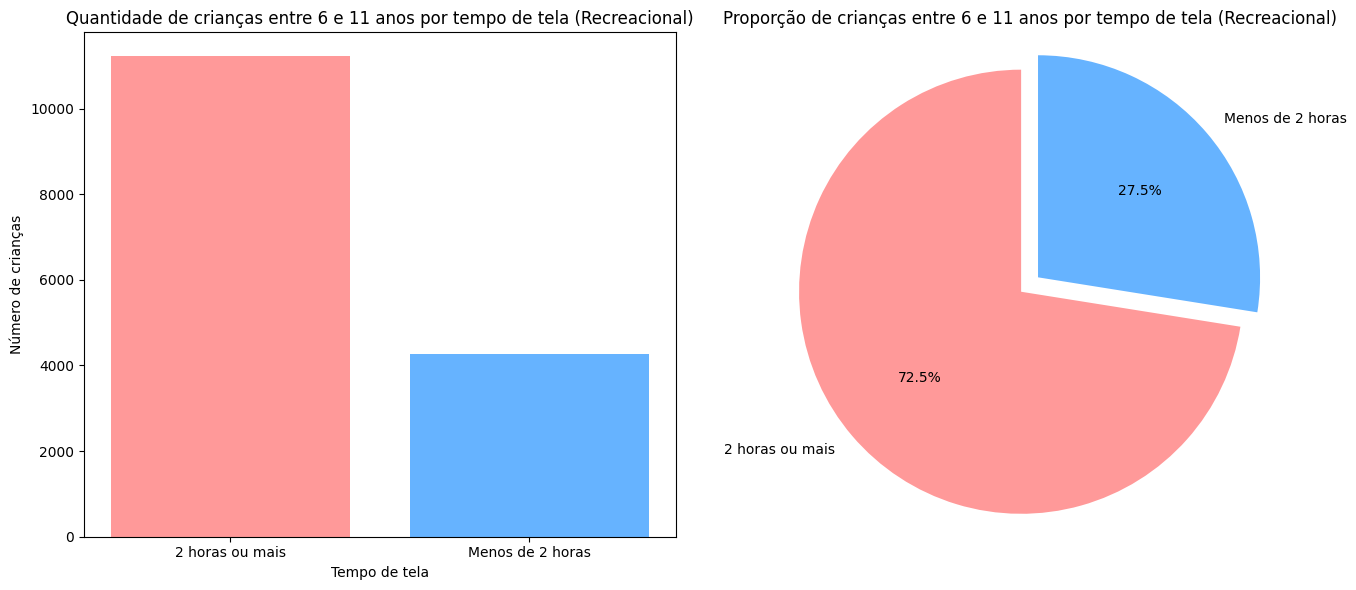

In [184]:
def ScreenTime6e11anos():
    # Filtrar crianças entre 6 e 11 anos com mais de 2 horas de tempo de tela
    criancas_entre_6_e_11_anos = df[(df['Age'] >= 6) & (df['Age'] <= 11) & (df['Average Screen Time (hours)'] >= 2) & (df['Screen Time Type'] == 'Recreational')]

    # Filtrar crianças entre 6 e 11 anos com menos de 2 horas de tempo de tela
    criancas_entre_6_e_11_anos_abaixo = df[(df['Age'] >= 6) & (df['Age'] <= 11) & (df['Average Screen Time (hours)'] < 2) & (df['Screen Time Type'] == 'Recreational')]

    # Contar o número de crianças em cada grupo
    numero_acima = criancas_entre_6_e_11_anos['Sample Size'].sum()
    numero_abaixo = criancas_entre_6_e_11_anos_abaixo['Sample Size'].sum()

    # Dados para os gráficos
    labels = ['2 horas ou mais', 'Menos de 2 horas']
    values = [numero_acima, numero_abaixo]
    colors = ['#ff9999', '#66b3ff']
    explode = (0.1, 0)  # Destacar o primeiro pedaço no gráfico de pizza

    # Criar subplots para exibir os gráficos lado a lado
    plt.figure(figsize=(14, 6))

    # Gráfico de barras
    plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
    plt.bar(labels, values, color=colors)
    plt.title('Quantidade de crianças entre 6 e 11 anos por tempo de tela (Recreacional)')
    plt.ylabel('Número de crianças')
    plt.xlabel('Tempo de tela')

    # Gráfico de pizza
    plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
    plt.pie(values, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
    plt.title('Proporção de crianças entre 6 e 11 anos por tempo de tela (Recreacional)')
    plt.axis('equal')  # Garantir que o gráfico seja um círculo

    # Exibir os gráficos
    plt.tight_layout()
    plt.show()


# Quantidade de crianças de 6 a 11 anos com mais de 2 horas de tempo de tela e gráficos lado a lado
ScreenTime6e11anos()

6. Relação de tempo de tela recomendado para crianças maiores que 11 anos recreacional.

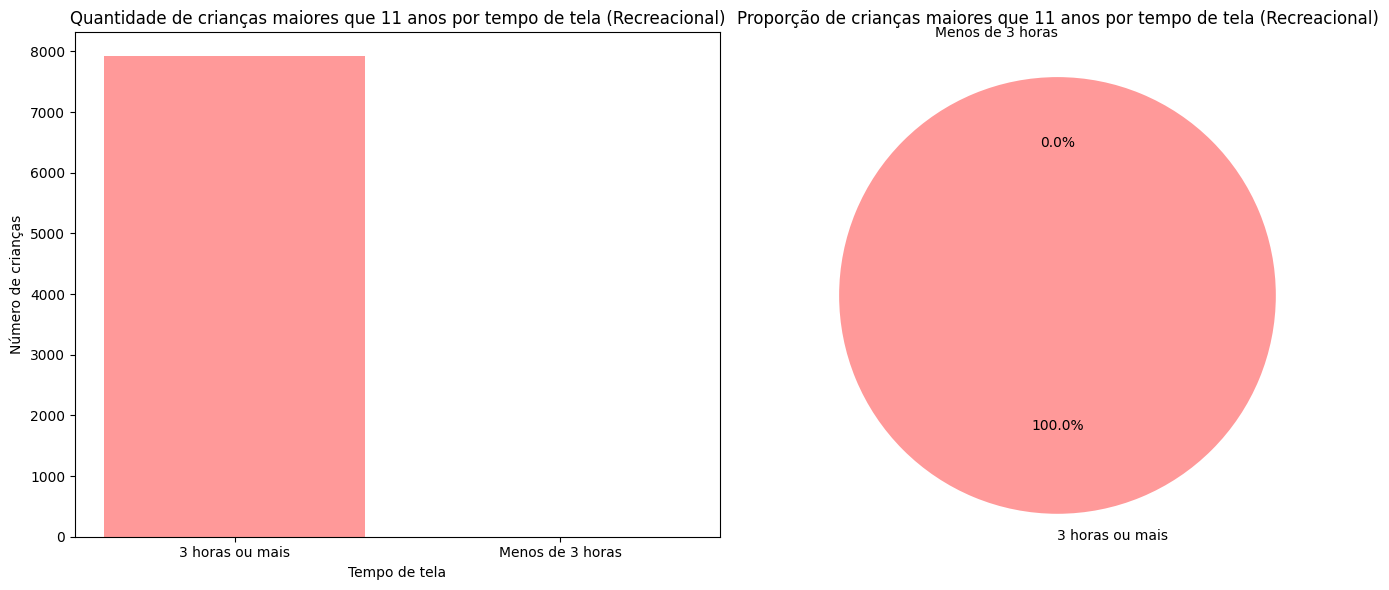

In [185]:
def ScreenTimeMaior11anos():
    # Filtrar crianças maiores que 11 anos com mais de 3 horas de tempo de tela e tipo de tela "Total"
    criancas_maior_11_anos = df[(df['Age'] > 11) & 
                                (df['Average Screen Time (hours)'] >= 3) & 
                                (df['Screen Time Type'] == 'Recreational')]

    # Filtrar crianças maiores que 11 anos com menos de 3 horas de tempo de tela e tipo de tela "Total"
    criancas_maior_11_anos_abaixo = df[(df['Age'] > 11) & 
                                       (df['Average Screen Time (hours)'] < 3) & 
                                       (df['Screen Time Type'] == 'Recreational')]

    # Contar o número de crianças em cada grupo
    numero_acima = criancas_maior_11_anos['Sample Size'].sum()
    numero_abaixo = criancas_maior_11_anos_abaixo['Sample Size'].sum()

    # Dados para os gráficos
    labels = ['3 horas ou mais', 'Menos de 3 horas']
    values = [numero_acima, numero_abaixo]
    colors = ['#ff9999', '#66b3ff']
    explode = (0.1, 0)  # Destacar o primeiro pedaço no gráfico de pizza

    # Criar subplots para exibir os gráficos lado a lado
    plt.figure(figsize=(14, 6))

    # Gráfico de barras
    plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
    plt.bar(labels, values, color=colors)
    plt.title('Quantidade de crianças maiores que 11 anos por tempo de tela (Recreacional)')
    plt.ylabel('Número de crianças')
    plt.xlabel('Tempo de tela')

    # Gráfico de pizza
    plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
    plt.pie(values, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
    plt.title('Proporção de crianças maiores que 11 anos por tempo de tela (Recreacional)')
    plt.axis('equal')  # Garantir que o gráfico seja um círculo

    # Exibir os gráficos
    plt.tight_layout()
    plt.show()


# Quantidade de crianças maiores que 11 anos com mais de 3 horas de tempo de tela e gráficos lado a lado
ScreenTimeMaior11anos()

7. Qual é a média de tempo de tela total por idade durante a semana e o fim de semana?

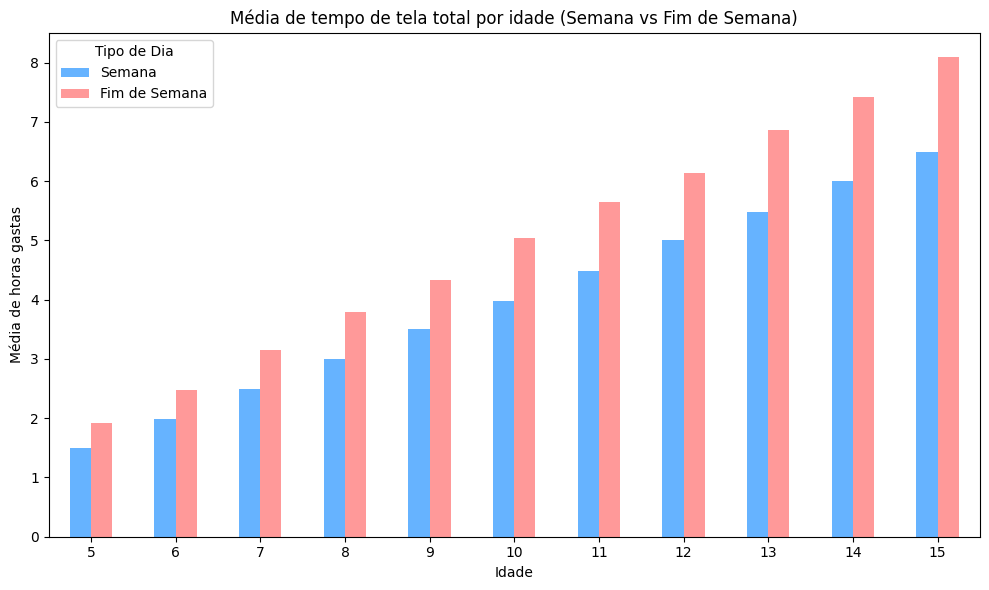

In [186]:
def media_tempo_tela_por_idade():
    # Filtrar dados para os tipos de tela "Total" e agrupar por idade e dia da semana
    tela_total = df[df['Screen Time Type'] == 'Total']
    media_tela = tela_total.groupby(['Age', 'Day Type'])['Average Screen Time (hours)'].mean().unstack()

    # Criar o gráfico de barras agrupadas
    media_tela.plot(kind='bar', figsize=(10, 6), color=['#66b3ff', '#ff9999'])
    plt.title('Média de tempo de tela total por idade (Semana vs Fim de Semana)')
    plt.ylabel('Média de horas gastas')
    plt.xlabel('Idade')
    plt.xticks(rotation=0)
    plt.legend(title='Tipo de Dia', labels=['Semana', 'Fim de Semana'])
    plt.tight_layout()
    plt.show()


# Chamar a função para exibir o gráfico
media_tempo_tela_por_idade()

8. Qual é a distribuição do tempo de tela recreativo por gênero nos finais de semana?

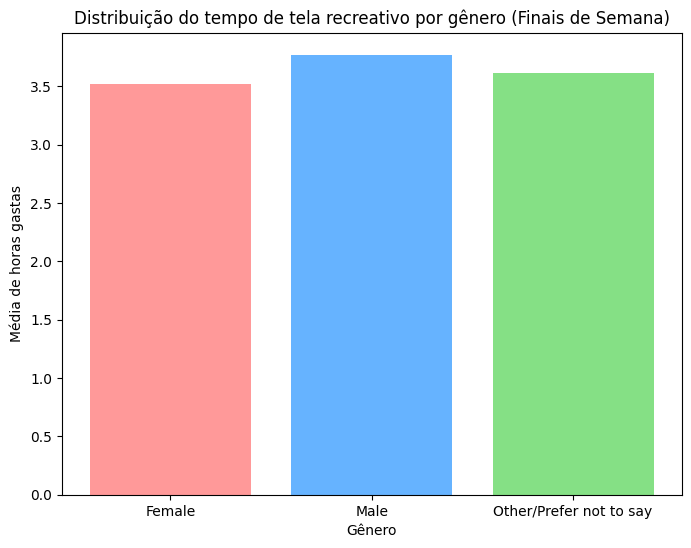

In [187]:
def distribuicao_tempo_tela_recreativo_genero():
    # Filtrar dados para tipo de tela "Recreational" e finais de semana
    tela_recreativa_fim_semana = df[(df['Screen Time Type'] == 'Recreational') & (df['Day Type'] == 'Weekend')]

    # Agrupar por gênero e calcular a média de horas gastas
    media_horas_genero = tela_recreativa_fim_semana.groupby('Gender')['Average Screen Time (hours)'].mean()

    # Dados para o gráfico
    labels = media_horas_genero.index
    values = media_horas_genero.values
    colors = ['#ff9999', '#66b3ff', '#85e085']  # Vermelho para Female, Azul para Male, Verde para Other/Prefer not to say

    # Criar o gráfico de barras
    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=colors)
    plt.title('Distribuição do tempo de tela recreativo por gênero (Finais de Semana)')
    plt.ylabel('Média de horas gastas')
    plt.xlabel('Gênero')
    plt.show()


# Chamar a função para exibir o gráfico
distribuicao_tempo_tela_recreativo_genero()

9. Quais são as faixas etárias com maior tempo de tela educacional durante os dias de semana?

Faixa(s) etária(s) com maior tempo de tela educacional durante os dias de semana: [15]
Tempo médio de tela educacional: 1.72 horas


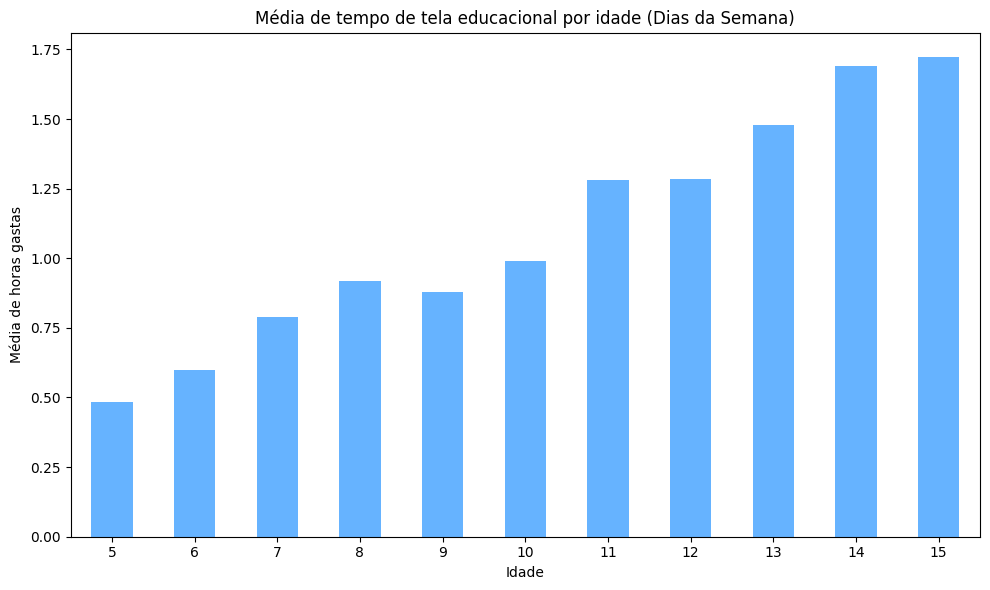

In [188]:
def faixa_etaria_maior_tempo_educacional():
    # Filtrar dados para tipo de tela "Educational" e dias da semana (Weekday)
    tela_educacional_semana = df[(df['Screen Time Type'] == 'Educational') & (df['Day Type'] == 'Weekday')]

    # Agrupar por idade e calcular a média de horas gastas
    media_horas_por_idade = tela_educacional_semana.groupby('Age')['Average Screen Time (hours)'].mean()

    # Identificar a(s) faixa(s) etária(s) com maior tempo de tela educacional
    maior_tempo = media_horas_por_idade.max()
    faixas_etarias = media_horas_por_idade[media_horas_por_idade == maior_tempo].index.tolist()

    # Exibir o resultado
    print(f"Faixa(s) etária(s) com maior tempo de tela educacional durante os dias de semana: {faixas_etarias}")
    print(f"Tempo médio de tela educacional: {maior_tempo:.2f} horas")

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    media_horas_por_idade.plot(kind='bar', color='#66b3ff')
    plt.title('Média de tempo de tela educacional por idade (Dias da Semana)')
    plt.ylabel('Média de horas gastas')
    plt.xlabel('Idade')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


# Chamar a função para exibir o resultado e o gráfico
faixa_etaria_maior_tempo_educacional()

10. Quais idades têm o maior tempo total de tela (soma de semana + fim de semana)?

Idade(s) com maior tempo total de tela: [15]
Tempo total de tela: 43.75 horas


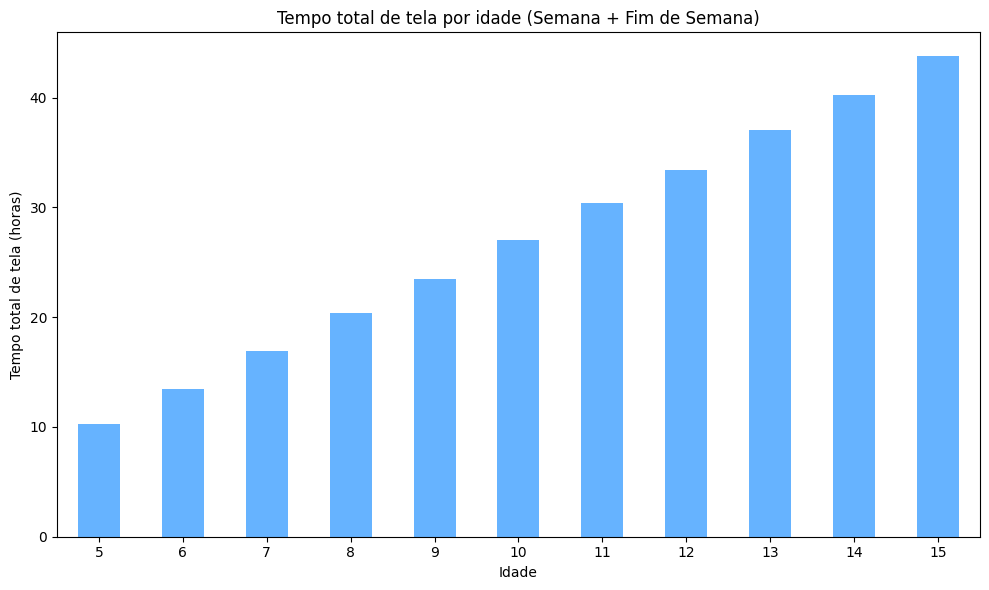

In [189]:
def idades_maior_tempo_total_tela():
    # Filtrar dados para o tipo de tela "Total"
    tela_total = df[df['Screen Time Type'] == 'Total']

    # Agrupar por idade e calcular a soma do tempo de tela (semana + fim de semana)
    soma_tempo_tela = tela_total.groupby('Age')['Average Screen Time (hours)'].sum()

    # Identificar a(s) idade(s) com o maior tempo total de tela
    maior_tempo = soma_tempo_tela.max()
    idades_maior_tempo = soma_tempo_tela[soma_tempo_tela == maior_tempo].index.tolist()

    # Exibir o resultado
    print(f"Idade(s) com maior tempo total de tela: {idades_maior_tempo}")
    print(f"Tempo total de tela: {maior_tempo:.2f} horas")

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    soma_tempo_tela.plot(kind='bar', color='#66b3ff')
    plt.title('Tempo total de tela por idade (Semana + Fim de Semana)')
    plt.ylabel('Tempo total de tela (horas)')
    plt.xlabel('Idade')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


# Chamar a função para exibir o resultado e o gráfico
idades_maior_tempo_total_tela()